# **Proyek Analisis Data : Bike Sharing Dataset (Day)**

Nama : Aulia Zhalsabila Z.

Email : Bilashalsa21@gmail.com

Id Dicoding : auliazhalsabilaa

## Pertanyaan Bisnis

1. Bagaimana distribusi penyewaan sepeda di setiap musimnya?

2. Bagaimana jumlah pesepeda pada tahun 2011 -2012?

## Library

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data 

In [52]:
df = pd.read_csv("day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

#### Info dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Pengencekan terhadap ukuran dataset

In [54]:
df.shape

(731, 16)

#### Pengencekan terhadap missing value

In [55]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Pengencekan terhadap outliers

In [56]:
kolom_numerik = df.drop(columns='dteday')

Q1 = kolom_numerik.quantile(0.25)
Q3 = kolom_numerik.quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = ((kolom_numerik < batas_bawah) | (kolom_numerik > batas_atas)).sum()

print(outliers)

instant        0
season         0
yr             0
mnth           0
holiday       21
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64


#### Menampilkan outliers dalam bentuk Boxplot

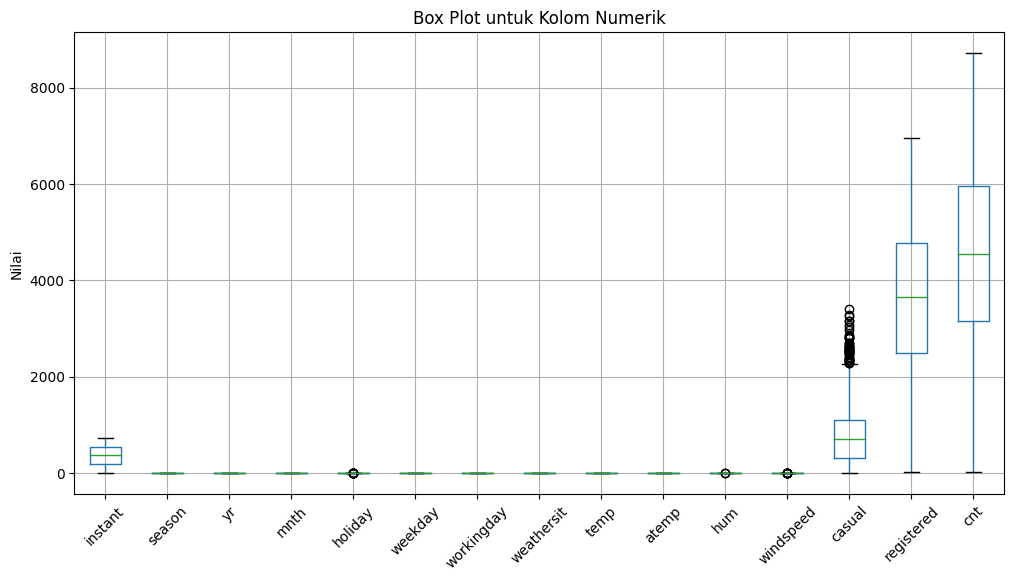

In [57]:
plt.figure(figsize=(12, 6)) 
df.boxplot()
plt.title('Box Plot untuk Kolom Numerik')
plt.ylabel('Nilai')
plt.xticks(rotation=45)  # 
plt.show()

### Cleaning Data

#### Menangani outliers

In [58]:
# Mengidentifikasi baris yang mengandung outliers
outliers_mask = ((kolom_numerik < batas_bawah) | (kolom_numerik > batas_atas)).any(axis=1)

# Menghapus baris yang mengandung outliers
df_cleaned = df[~outliers_mask]

# Menampilkan informasi sebelum dan setelah penghapusan outliers
print("Jumlah baris sebelum penghapusan outliers:", df.shape[0])
print("Jumlah baris setelah penghapusan outliers:", df_cleaned.shape[0])


Jumlah baris sebelum penghapusan outliers: 731
Jumlah baris setelah penghapusan outliers: 655


## Exploratory Data Analysis (EDA)

In [59]:
df = df_cleaned

### Statistik Deskriptif

In [60]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
mean,357.366412,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000
max,731.000000,4.000000,1.000000,12.000000,0.0,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,2258.00000,6946.000000,8173.000000


### Korelasi

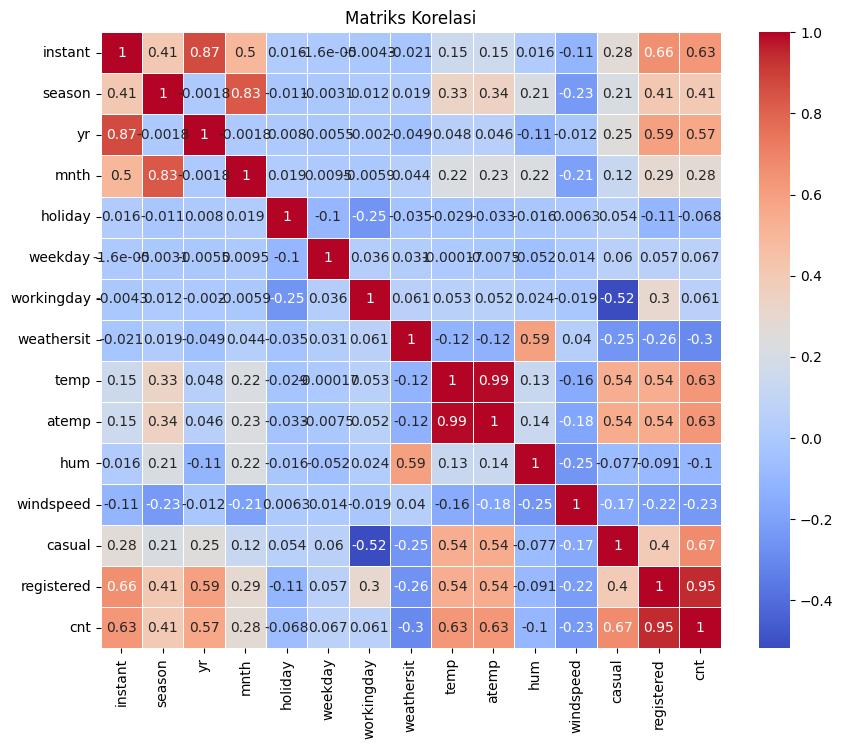

In [61]:
# Matriks korelasi
corr_matrix = kolom_numerik.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()


### Persebaran Data

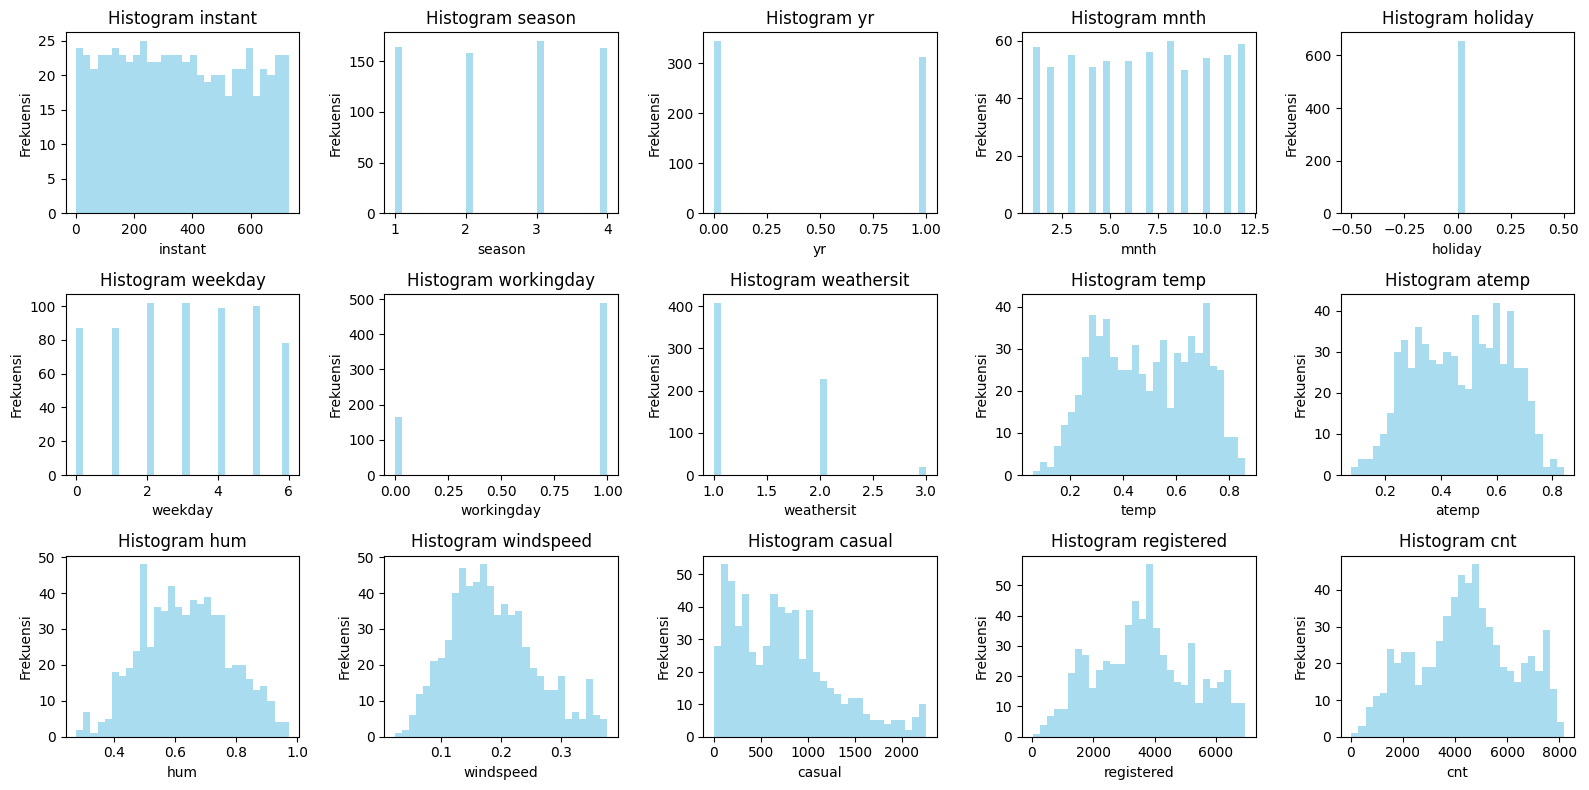

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 8))

# Menampilkan histogram untuk setiap kolom
for i, kolom in enumerate(kolom_numerik):
    row = i // 5
    col = i % 5
    axes[row, col].hist(df[kolom], bins=30, color='skyblue', alpha=0.7)
    axes[row, col].set_title(f'Histogram {kolom}')
    axes[row, col].set_xlabel(kolom)
    axes[row, col].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Pertanyaan 1

#### Bagaimana distribusi penyewaan sepeda di setiap musimnya?

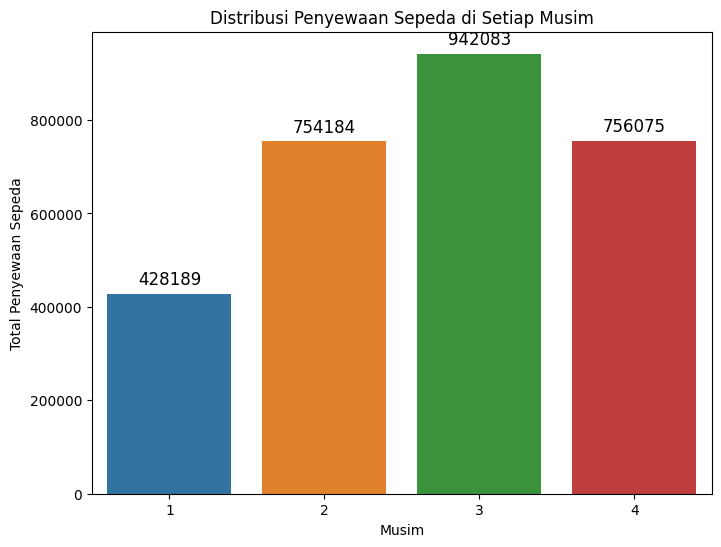

In [71]:

# Pengelompokan berdasarkan musim dan menghitung total penyewaan sepeda
distribusi_musim = df.groupby('season')['cnt'].sum()

# Plot distribusi penyewaan sepeda di setiap musim
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=distribusi_musim.index, y=distribusi_musim.values)
plt.title('Distribusi Penyewaan Sepeda di Setiap Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan Sepeda')

# Menambahkan label jumlah pada setiap batang diagram
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()


##### Terdapat beberapa alasan yang mempengaruhi jumlah penyewaan sepeda pada tiap musimnya : 

**1 Berarti Musim Semi**

- Pada awal musim semi, suhu mungkin masih relatif rendah, dan orang mungkin masih menunggu hingga cuaca benar-benar hangat sebelum mulai menggunakan sepeda secara aktif.

- Musim semi sering kali dapat memiliki cuaca yang tidak menentu dengan perubahan suhu dan hujan, yang dapat memengaruhi keinginan orang untuk menggunakan sepeda.

**2 Berarti Musim Panas**

- Musim panas sering kali memiliki cuaca yang hangat dan cerah, menciptakan kondisi yang sangat baik untuk bersepeda dan aktivitas luar ruangan lainnya.

- Musim panas adalah waktu liburan paling populer, dan banyak orang menggunakan waktu ini untuk melakukan perjalanan atau berlibur. Aktivitas luar ruangan seperti bersepeda menjadi sangat diminati selama periode ini.

- Musim panas sering kali dianggap sebagai waktu untuk bersantai, dan bersepeda bisa menjadi salah satu cara yang menyenangkan dan sehat untuk menghabiskan waktu luang.

**3 Berarti Musim Gugur**

- Musim gugur sering dianggap sebagai musim dengan cuaca yang nyaman dan stabil. Suhu yang tidak terlalu panas atau terlalu dingin membuat kondisi ideal untuk bersepeda.

- Keindahan perubahan warna daun pada musim gugur mungkin membuat orang lebih tertarik untuk bersepeda dan menikmati pemandangan alam.

**4 Berarti Musim Dingin**

- Musim dingin sering kali dianggap sebagai waktu liburan dan liburan tahun baru, yang dapat meningkatkan jumlah orang yang aktif dan mencari sarana transportasi seperti sepeda.

- Beberapa wilayah memiliki acara-acara khusus selama musim dingin, seperti festival lampu Natal atau olahraga musim dingin, yang dapat menarik lebih banyak orang keluar rumah dan menggunakan sepeda.

- Libur sekolah selama musim dingin dapat meningkatkan aktivitas luar ruangan, termasuk bersepeda. Orang tua dan anak-anak mungkin lebih cenderung melakukan aktivitas bersama selama libur.

### Pertanyaan 2

#### Bagaimana jumlah pesepeda pada tahun 2011 -2012?

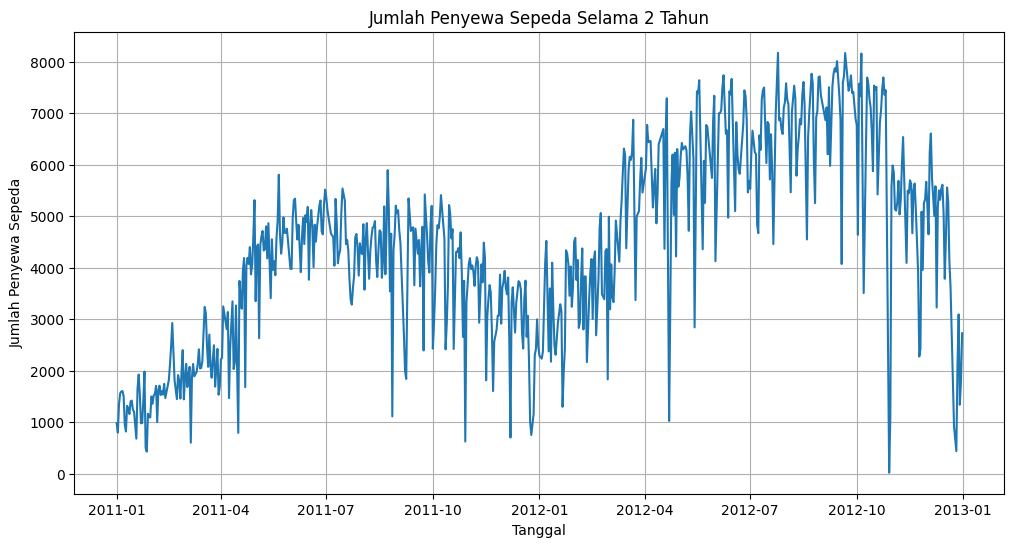

In [64]:

# Menggunakan kolom 'dteday' sebagai indeks (pastikan kolom 'dteday' memiliki tipe data datetime)
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)

# Plot garis untuk jumlah penyewa sepeda selama 2 tahun
plt.figure(figsize=(12, 6))
plt.plot(df['cnt'])
plt.title('Jumlah Penyewa Sepeda Selama 2 Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.grid(True)
plt.show()


##### Kesimpulan : 

Terdapat pola dimana, pada bulan ke-4 sampai bulan ke-10, selalu terjadi tren naik dari penyewaan sepeda. 

## Analisis Clustering

#### Penggunaan Elbow Method untuk menentukan jumlah cluster paling optimal

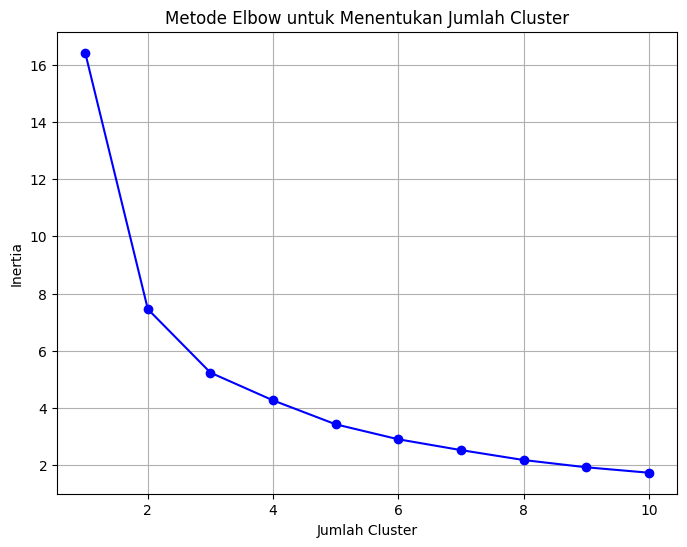

In [66]:
df_cluster = df[['hum', 'windspeed']]

# Menentukan jumlah cluster (gunakan metode Elbow untuk memilih jumlah cluster yang optimal)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method untuk menentukan jumlah cluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.grid(True)
plt.show()

#### Jumlah Data Tiap Cluster

In [72]:
# Berdasarkan hasil Elbow Method, pilih jumlah cluster yang optimal
k = 3  

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=k, random_state=0, n_init=1)
clusters = kmeans.fit_predict(df_cluster)

# Menambahkan label cluster ke DataFrame
df['Cluster'] = clusters

# Menampilkan jumlah data dalam setiap cluster
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Jumlah Data']
print("\nJumlah Data dalam Setiap Cluster:")
cluster_counts


Jumlah Data dalam Setiap Cluster:


,Cluster,Jumlah Data
0,0,261
1,1,207
2,2,187


#### Visualisasi Clustering

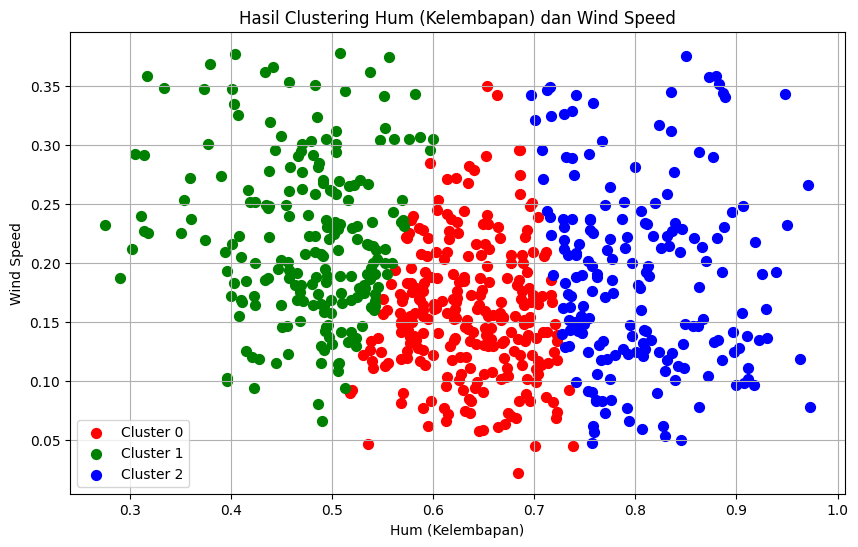

In [74]:
colors = ['red', 'green', 'blue']

# Plot hasil clustering dengan label warna
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['hum'], cluster_data['windspeed'], c=colors[i], label=f'Cluster {i}', marker='o', s=50)

plt.xlabel('Hum (Kelembapan)')
plt.ylabel('Wind Speed')
plt.title('Hasil Clustering Hum (Kelembapan) dan Wind Speed')
plt.legend()  # Menampilkan legenda
plt.grid(True)
plt.show()